In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("car_dataset_1.csv")

In [4]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [5]:
Car_Name = df["Car_Name"].nunique()
Fuel_Type = df["Fuel_Type"].unique()
Seller_Type = df["Seller_Type"].unique()
Transmission = df["Transmission"].unique() 
Owner = df["Owner"].unique()
print(Car_Name)
print(Fuel_Type )
print(Seller_Type)
print(Transmission)
print(Owner)

98
['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [6]:
df.drop('Car_Name',axis = 1,inplace = True)

In [7]:
df = pd.get_dummies(df, drop_first = True)

In [8]:
df

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,0,1,0,1
1,2013,4.75,9.54,43000,0,1,0,0,1
2,2017,7.25,9.85,6900,0,0,1,0,1
3,2011,2.85,4.15,5200,0,0,1,0,1
4,2014,4.60,6.87,42450,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,0,1,0,0,1
297,2015,4.00,5.90,60000,0,0,1,0,1
298,2009,3.35,11.00,87934,0,0,1,0,1
299,2017,11.50,12.50,9000,0,1,0,0,1


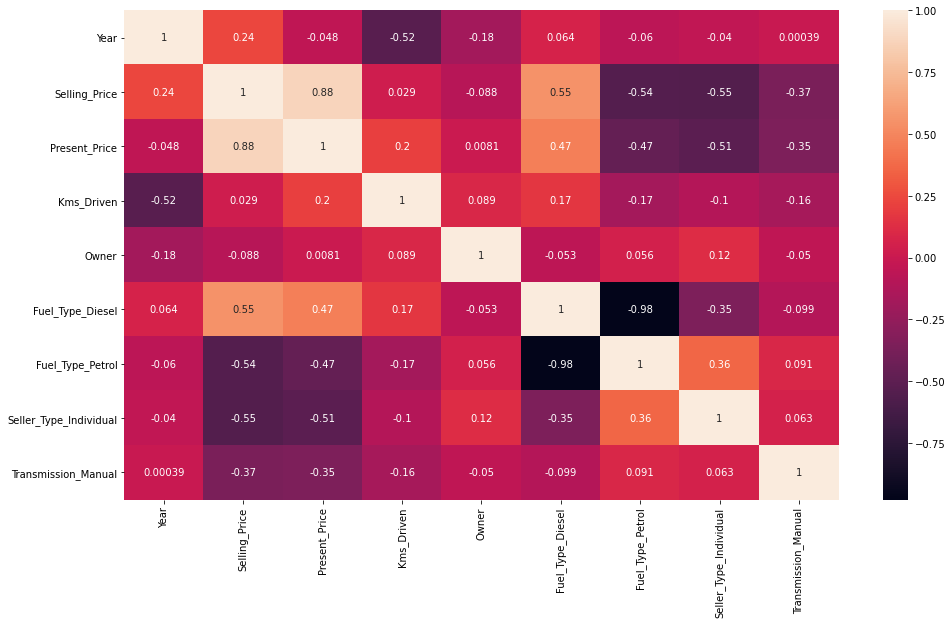

In [9]:
plt.figure(figsize = (16,9))
sns.heatmap(df.corr(),annot = True)
plt.show()

In [10]:
x = df.drop('Selling_Price', axis = 1)
y = df['Selling_Price']

In [11]:
x.iloc[0:300,:]
xtest = x.iloc[300:301,:]
ytest = y.iloc[300:301]

In [12]:
x1 = x.iloc[0:300,:]
y1 = y.iloc[0:300]

In [13]:
x1

,Year,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,5.59,27000,0,0,1,0,1
1,2013,9.54,43000,0,1,0,0,1
2,2017,9.85,6900,0,0,1,0,1
3,2011,4.15,5200,0,0,1,0,1
4,2014,6.87,42450,0,1,0,0,1
...,...,...,...,...,...,...,...,...
295,2015,13.09,60076,0,1,0,0,1
296,2016,11.60,33988,0,1,0,0,1
297,2015,5.90,60000,0,0,1,0,1
298,2009,11.00,87934,0,0,1,0,1


In [14]:
from sklearn.preprocessing import StandardScaler
scal = StandardScaler()
scal.fit(x)
x1 = scal.transform(x1)
xtest = scal.transform(xtest)

# random forst regressor algorithm

In [15]:
from sklearn.ensemble import RandomForestRegressor
rfc =  RandomForestRegressor(n_estimators =100)
rfc.fit(x1,y1)
Y_rfpred = rfc.predict(xtest)
print(Y_rfpred)
from sklearn.model_selection import cross_val_score as cvs
score = cvs(rfc,x,y,cv=4)
print(score)
print(score.mean())
print(xtest.ndim)

[5.3785]
[0.92223761 0.77305831 0.9688711  0.85560028]
0.879941824509878
2


In [72]:
from sklearn.model_selection import RandomizedSearchCV
rfc1 =  RandomForestRegressor()
lr = { 'n_estimators':[100,150,200,250,300,350,400,450,500],
    'criterion':["mse", "mae"],
    'max_depth': [0,1,2,3,4,5,6,7,8,9,10],
    'min_samples_split':[0,1,2,4,6,8,10,12,14,16],
    'min_samples_leaf':[0,1,3,5,7,9,11,13]}
random = RandomizedSearchCV(estimator =rfc1 ,param_distributions=lr , scoring = 'r2', cv =10 , n_iter = 10, verbose =2)
random.fit(x1,y1)
print(random.best_estimator_)
print(random.best_params_)


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] n_estimators=250, min_samples_split=16, min_samples_leaf=13, max_depth=7, criterion=mae 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=250, min_samples_split=16, min_samples_leaf=13, max_depth=7, criterion=mae, total=   0.7s
[CV] n_estimators=250, min_samples_split=16, min_samples_leaf=13, max_depth=7, criterion=mae 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  n_estimators=250, min_samples_split=16, min_samples_leaf=13, max_depth=7, criterion=mae, total=   0.8s
[CV] n_estimators=250, min_samples_split=16, min_samples_leaf=13, max_depth=7, criterion=mae 
[CV]  n_estimators=250, min_samples_split=16, min_samples_leaf=13, max_depth=7, criterion=mae, total=   0.9s
[CV] n_estimators=250, min_samples_split=16, min_samples_leaf=13, max_depth=7, criterion=mae 
[CV]  n_estimators=250, min_samples_split=16, min_samples_leaf=13, max_depth=7, criterion=mae, total=   0.7s
[CV] n_estimators=250, min_samples_split=16, min_samples_leaf=13, max_depth=7, criterion=mae 
[CV]  n_estimators=250, min_samples_split=16, min_samples_leaf=13, max_depth=7, criterion=mae, total=   0.7s
[CV] n_estimators=250, min_samples_split=16, min_samples_leaf=13, max_depth=7, criterion=mae 
[CV]  n_estimators=250, min_samples_split=16, min_samples_leaf=13, max_depth=7, criterion=mae, total=   0.7s
[CV] n_estimators=250, min_samples_split=16, min_samples_leaf=13, max_depth=7, 

[CV]  n_estimators=200, min_samples_split=8, min_samples_leaf=13, max_depth=8, criterion=mae, total=   0.5s
[CV] n_estimators=200, min_samples_split=8, min_samples_leaf=13, max_depth=8, criterion=mae 
[CV]  n_estimators=200, min_samples_split=8, min_samples_leaf=13, max_depth=8, criterion=mae, total=   0.6s
[CV] n_estimators=200, min_samples_split=8, min_samples_leaf=13, max_depth=8, criterion=mae 
[CV]  n_estimators=200, min_samples_split=8, min_samples_leaf=13, max_depth=8, criterion=mae, total=   0.6s
[CV] n_estimators=200, min_samples_split=8, min_samples_leaf=13, max_depth=8, criterion=mae 
[CV]  n_estimators=200, min_samples_split=8, min_samples_leaf=13, max_depth=8, criterion=mae, total=   0.5s
[CV] n_estimators=200, min_samples_split=8, min_samples_leaf=13, max_depth=8, criterion=mae 
[CV]  n_estimators=200, min_samples_split=8, min_samples_leaf=13, max_depth=8, criterion=mae, total=   0.6s
[CV] n_estimators=200, min_samples_split=8, min_samples_leaf=13, max_depth=8, criterion=

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "D:\Anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "D:\Anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "D:\Anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "D:\Anaconda3\lib\site-packages\joblib\_parallel_backends.py", l

[CV]  n_estimators=400, min_samples_split=0, min_samples_leaf=1, max_depth=0, criterion=mae, total=   0.2s
[CV] n_estimators=400, min_samples_split=0, min_samples_leaf=1, max_depth=0, criterion=mae 


D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "D:\Anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "D:\Anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "D:\Anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "D:\Anaconda3\lib\site-packages\joblib\_parallel_backends.py", l

[CV]  n_estimators=400, min_samples_split=0, min_samples_leaf=1, max_depth=0, criterion=mae, total=   0.2s
[CV] n_estimators=400, min_samples_split=0, min_samples_leaf=1, max_depth=0, criterion=mae 


D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "D:\Anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "D:\Anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "D:\Anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "D:\Anaconda3\lib\site-packages\joblib\_parallel_backends.py", l

[CV]  n_estimators=400, min_samples_split=0, min_samples_leaf=1, max_depth=0, criterion=mae, total=   0.2s
[CV] n_estimators=400, min_samples_split=0, min_samples_leaf=1, max_depth=0, criterion=mae 


D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "D:\Anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "D:\Anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "D:\Anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "D:\Anaconda3\lib\site-packages\joblib\_parallel_backends.py", l

[CV]  n_estimators=400, min_samples_split=0, min_samples_leaf=1, max_depth=0, criterion=mae, total=   0.2s
[CV] n_estimators=400, min_samples_split=0, min_samples_leaf=1, max_depth=0, criterion=mae 


D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "D:\Anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "D:\Anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "D:\Anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "D:\Anaconda3\lib\site-packages\joblib\_parallel_backends.py", l

[CV]  n_estimators=400, min_samples_split=0, min_samples_leaf=1, max_depth=0, criterion=mae, total=   0.2s
[CV] n_estimators=400, min_samples_split=0, min_samples_leaf=1, max_depth=0, criterion=mae 


D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "D:\Anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "D:\Anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "D:\Anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "D:\Anaconda3\lib\site-packages\joblib\_parallel_backends.py", l

[CV]  n_estimators=400, min_samples_split=0, min_samples_leaf=1, max_depth=0, criterion=mae, total=   0.3s
[CV] n_estimators=400, min_samples_split=0, min_samples_leaf=1, max_depth=0, criterion=mae 


D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "D:\Anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "D:\Anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "D:\Anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "D:\Anaconda3\lib\site-packages\joblib\_parallel_backends.py", l

[CV]  n_estimators=400, min_samples_split=0, min_samples_leaf=1, max_depth=0, criterion=mae, total=   0.3s
[CV] n_estimators=400, min_samples_split=0, min_samples_leaf=1, max_depth=0, criterion=mae 


D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "D:\Anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "D:\Anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "D:\Anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "D:\Anaconda3\lib\site-packages\joblib\_parallel_backends.py", l

[CV]  n_estimators=400, min_samples_split=0, min_samples_leaf=1, max_depth=0, criterion=mae, total=   0.2s
[CV] n_estimators=400, min_samples_split=0, min_samples_leaf=1, max_depth=0, criterion=mae 


D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "D:\Anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "D:\Anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "D:\Anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "D:\Anaconda3\lib\site-packages\joblib\_parallel_backends.py", l

[CV]  n_estimators=400, min_samples_split=0, min_samples_leaf=1, max_depth=0, criterion=mae, total=   0.3s
[CV] n_estimators=400, min_samples_split=0, min_samples_leaf=1, max_depth=0, criterion=mae 


D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "D:\Anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "D:\Anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "D:\Anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "D:\Anaconda3\lib\site-packages\joblib\_parallel_backends.py", l

[CV]  n_estimators=400, min_samples_split=0, min_samples_leaf=1, max_depth=0, criterion=mae, total=   0.3s
[CV] n_estimators=100, min_samples_split=8, min_samples_leaf=5, max_depth=1, criterion=mse 
[CV]  n_estimators=100, min_samples_split=8, min_samples_leaf=5, max_depth=1, criterion=mse, total=   0.2s
[CV] n_estimators=100, min_samples_split=8, min_samples_leaf=5, max_depth=1, criterion=mse 
[CV]  n_estimators=100, min_samples_split=8, min_samples_leaf=5, max_depth=1, criterion=mse, total=   0.2s
[CV] n_estimators=100, min_samples_split=8, min_samples_leaf=5, max_depth=1, criterion=mse 
[CV]  n_estimators=100, min_samples_split=8, min_samples_leaf=5, max_depth=1, criterion=mse, total=   0.2s
[CV] n_estimators=100, min_samples_split=8, min_samples_leaf=5, max_depth=1, criterion=mse 
[CV]  n_estimators=100, min_samples_split=8, min_samples_leaf=5, max_depth=1, criterion=mse, total=   0.2s
[CV] n_estimators=100, min_samples_split=8, min_samples_leaf=5, max_depth=1, criterion=mse 
[CV] 

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.0min finished


RandomForestRegressor(max_depth=6, min_samples_leaf=7, min_samples_split=10,
                      n_estimators=150)
{'n_estimators': 150, 'min_samples_split': 10, 'min_samples_leaf': 7, 'max_depth': 6, 'criterion': 'mse'}


In [73]:
random.best_score_

-0.2151631028116713

In [74]:
random.predict(xtest)

array([5.24921113])

# linear regression algorithm

In [19]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x1,y1)
f = lr.predict(xtest)
from sklearn.model_selection import cross_val_score as cvs
score = cvs(lr,x1,y1,cv=4)
print(score)
print(score.mean())

[-6.92719665e+24  7.39697800e-01  2.49184280e-02  7.65221446e-01]
-1.731799163494898e+24


In [18]:
print(f)

[4.91918692]


# adaboost regressor

In [50]:
from sklearn.ensemble import AdaBoostRegressor
ada =  AdaBoostRegressor()

In [66]:
lr1 = { 'n_estimators':[0,100,150],
    'learning_rate':[0.1,0.3,0.5,0.7,0.9,1.0],
     'loss' : ['linear', 'square', 'exponential'] }
random1 = RandomizedSearchCV(estimator =ada ,param_distributions=lr1 ,scoring = 'r2', cv =10 , n_iter = 10, verbose =2)
random1.fit(x1,y1)
print(random1.best_estimator_)
print(random1.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] n_estimators=0, loss=linear, learning_rate=0.1 ..................
[CV] ... n_estimators=0, loss=linear, learning_rate=0.1, total=   0.0s
[CV] n_estimators=0, loss=linear, learning_rate=0.1 ..................
[CV] ... n_estimators=0, loss=linear, learning_rate=0.1, total=   0.0s
[CV] n_estimators=0, loss=linear, learning_rate=0.1 ..................
[CV] ... n_estimators=0, loss=linear, learning_rate=0.1, total=   0.0s
[CV] n_estimators=0, loss=linear, learning_rate=0.1 ..................
[CV] ... n_estimators=0, loss=linear, learning_rate=0.1, total=   0.0s
[CV] n_estimators=0, loss=linear, learning_rate=0.1 ..................
[CV] ... n_estimators=0, loss=linear, learning_rate=0.1, total=   0.0s
[CV] n_estimators=0, loss=linear, learning_rate=0.1 ..................
[CV] ... n_estimators=0, loss=linear, learning_rate=0.1, total=   0.0s
[CV] n_estimators=0, loss=linear, learning_rate=0.1 ..................
[CV] ... n_est

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 1007, in fit
    return super().fit(X, y, sample_weight)
  File "D:\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 117, in fit
    self._validate_estimator()
  File "D:\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 1011, in _validate_estimator
    super()._validate_estimator(
  File "D:\Anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 134, in _validate_estimator
    raise 

[CV] . n_estimators=100, loss=linear, learning_rate=0.1, total=   0.2s
[CV] n_estimators=100, loss=linear, learning_rate=0.1 ................
[CV] . n_estimators=100, loss=linear, learning_rate=0.1, total=   0.2s
[CV] n_estimators=100, loss=linear, learning_rate=0.1 ................
[CV] . n_estimators=100, loss=linear, learning_rate=0.1, total=   0.2s
[CV] n_estimators=100, loss=linear, learning_rate=0.1 ................
[CV] . n_estimators=100, loss=linear, learning_rate=0.1, total=   0.2s
[CV] n_estimators=100, loss=linear, learning_rate=0.1 ................
[CV] . n_estimators=100, loss=linear, learning_rate=0.1, total=   0.2s
[CV] n_estimators=100, loss=linear, learning_rate=0.1 ................
[CV] . n_estimators=100, loss=linear, learning_rate=0.1, total=   0.2s
[CV] n_estimators=100, loss=linear, learning_rate=0.1 ................
[CV] . n_estimators=100, loss=linear, learning_rate=0.1, total=   0.2s
[CV] n_estimators=100, loss=linear, learning_rate=0.1 ................
[CV] .

[CV] . n_estimators=100, loss=square, learning_rate=0.9, total=   0.2s
[CV] n_estimators=150, loss=square, learning_rate=0.5 ................
[CV] . n_estimators=150, loss=square, learning_rate=0.5, total=   0.3s
[CV] n_estimators=150, loss=square, learning_rate=0.5 ................
[CV] . n_estimators=150, loss=square, learning_rate=0.5, total=   0.3s
[CV] n_estimators=150, loss=square, learning_rate=0.5 ................
[CV] . n_estimators=150, loss=square, learning_rate=0.5, total=   0.3s
[CV] n_estimators=150, loss=square, learning_rate=0.5 ................
[CV] . n_estimators=150, loss=square, learning_rate=0.5, total=   0.3s
[CV] n_estimators=150, loss=square, learning_rate=0.5 ................
[CV] . n_estimators=150, loss=square, learning_rate=0.5, total=   0.3s
[CV] n_estimators=150, loss=square, learning_rate=0.5 ................
[CV] . n_estimators=150, loss=square, learning_rate=0.5, total=   0.3s
[CV] n_estimators=150, loss=square, learning_rate=0.5 ................
[CV] .

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 1007, in fit
    return super().fit(X, y, sample_weight)
  File "D:\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 117, in fit
    self._validate_estimator()
  File "D:\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 1011, in _validate_estimator
    super()._validate_estimator(
  File "D:\Anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 134, in _validate_estimator
    raise ValueError("n_estimators must be greater than zero, "
ValueError: n_estimators mu

AdaBoostRegressor(learning_rate=0.1, n_estimators=100)
{'n_estimators': 100, 'loss': 'linear', 'learning_rate': 0.1}


In [67]:
random1.best_score_

-4.808203325006033

In [69]:
random1.predict(xtest)

array([5.32344086])

# Model saving using pickle

In [83]:
import pickle as pkl

In [87]:
#pkl.dump(random1,open("car_price_predmodel_ada",'wb'))

In [88]:
#pkl.dump(lr,open("car_price_predmodel_lr",'wb'))

In [89]:
#pkl.dump(random,open("car_price_predmodel_rfr",'wb'))

In [90]:
#pkl.dump(scal,open("data_transform_model",'wb'))